# <font color = Saffron>Telecom Churn - ML Group Case Study</font>

###### <font color = Saffron>Business Problem Overview</font>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

###### <font color = Saffron>Definitions of Churn</font>
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 


###### <font color = Saffron>Understanding Customer Behaviour During Churn</font>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### <font color=Red>Submitted By : </font>
#### 1) Nikunj Patel
#### 2) Rohith Shankar

# <font color = blue>Step 1 : Load the Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

#  <font color = blue>step 2 : Load the Data</font>

In [2]:
churn = pd.read_csv(r"C:\Users\Niks\Downloads\ML-2\Telecom churn case study\my case study\telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## <font color = blue> Step 2.1: Inspect the Dataframe</font>

In [3]:
# check the number of columns and row in dataset
churn.shape

(99999, 226)

In [4]:
# check the datatypes of column
churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

There are 99999 rows and 226 columns in the data. Lots of the columns are numeric type, but we need to inspect which are the categorical columns.

In [5]:
# check the number of columns and dtypes
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# let's look at the statistical aspects of the dataframe
churn.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# Backup the orignal dataset
churn1 = churn.copy()

##  <font color = blue>Step 2.2 : Fixing Data types & Columns name</font>
- Let's check for data types of the different columns.

In [8]:
churn1.reset_index(inplace=True,drop=True)

# list of all columns which store date
date_column = list(churn1.filter(regex='date').columns)
date_column

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [9]:
# Converting dtype of date columns to datetime
for col in date_column:
    churn1[col] = pd.to_datetime(churn1[col], format='%m/%d/%Y')

In [10]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


# <font color = blue> Step 3 : Data Cleaning</font>

##  <font color = blue>Step 3.1 : Checking Null values & Missing value in Dataset</font>

In [11]:
## Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
churn1.isnull().sum().sort_values(ascending=False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

In [12]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(churn1.isnull().sum()/len(churn1.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [13]:
# Function to retun the columns with more than missingCutoff% missing values.
def MissingValues(missingCutoff):
    
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(churn1.isnull().sum()/churn1.shape[0]))
    print("There are {} columns having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [14]:
# Function impute the nan with 0
# argument: colList, list of columns for which nan is to be replaced with 0
def impute(data,impute_ColList=False,missing_ColList=False):
    
    if impute_ColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in impute_ColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missing_ColList:
            data[col].fillna(0, inplace=True)

##  <font color = blue>Step 3.2 : Handiling missing values</font>

In [15]:
# Missing values per column expressed as 70% of total number of values
MissingValues(70)

There are 40 columns having more than 70% missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

- above these 40 features, many are required and are essential for analysis. 
- The missing values for these features seems to suggest that these customers did not have any value at that month. 
- We choose to impute these values with 0 to make these features to give value to analysis.

In [16]:
# we can see av_rech_amt_data_ features are important for getting the high-value customers,so we can't drop that columns so,
#lets impute the missing av_rech_amt_data_ with 0

impute_col = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

In [17]:
impute(churn1,impute_col)

In [18]:
# lets check the columns which has the missing value more than 50%
MissingValues(50)

There are 4 columns having more than 50% missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [19]:
# dropping the columns having more than 50% missing values
missing_col = list(MissingValues(50).index)
churn1.drop(missing_col,axis=1,inplace=True)
churn1.shape

There are 4 columns having more than 50% missing values


(99999, 222)

In [20]:
# lets check the columns which has the missing value more than 7%
MissingValues(7) 

There are 29 columns having more than 7% missing values


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

- We can see that all the missing values are from _9 month.no any other month missing values has more than 7%. so lets check the.

In [21]:
# checking if all these above columns go missing together since they have the same 8% missing values in each columns.
missing_col = list(MissingValues(7).index)
churn1[churn1[missing_col].isnull().all(axis=1)][missing_col].head()

There are 29 columns having more than 7% missing values


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- It looks like for Customers all these columns are empty together without any value. 
- We can choose to impute these values with 0.

In [22]:
# we impute these with values 0.
impute(churn1,missing_ColList=missing_col)

In [23]:
# lets check the columns which has the missing value more than 3%
MissingValues(3)

There are 89 columns having more than 3% missing values


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [24]:
# checking if all these above columns go missing together since they have the same 8% missing values in each columns.
missing_col = list(MissingValues(3).index)
churn1[churn1[missing_col].isnull().all(axis=1)][missing_col].head()

There are 89 columns having more than 3% missing values


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


- It looks like for Customers all these columns are empty together without any value.
- So lets drop these customer from the data.

In [25]:
# drop the customer without any value
churn1=churn1[~churn1[missing_col].isnull().all(axis=1)]

In [26]:
# check the total number of columns and row in data after drop the some columns
churn1.shape

(99618, 222)

In [27]:
# For other customers where missing values are spread out.let's impute them with zero.
missing_col.remove('date_of_last_rech_8')
missing_col.remove('date_of_last_rech_9')
impute(churn1,missing_ColList=missing_col)

In [28]:
# lets check the columns which has the missing value more than 0%
MissingValues(0)

There are 9 columns having more than 0% missing values


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [29]:
#Some of the columns take only one value. 
#Lets impute their missing values in these columns with the mode
colums = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for d in colums:
    print(churn1[d].value_counts())
    churn1[d].fillna(churn1[d].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
2014-07-31    99300
Name: last_date_of_month_7, dtype: int64
2014-08-31    98867
Name: last_date_of_month_8, dtype: int64
2014-09-30    98321
Name: last_date_of_month_9, dtype: int64


In [30]:
# lets check the columns which has the missing value more than 0%
MissingValues(0)

There are 4 columns having more than 0% missing values


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [31]:
# All these features are missing together
missing_col = list(MissingValues(0).index)
print ("There are %d rows having missing values"%(len(churn1[churn1[missing_col].isnull().all(axis=1)])))

There are 4 columns having more than 0% missing values
There are 22 rows having missing values


In [32]:
churn1[churn1['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn1[churn1['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn1[churn1['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn1[churn1['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [33]:
# look at the columns which has all values to zero.
zero_colum=churn1.columns[(churn1 == 0).all()]
print ("There are {} columns which has only 0 as values.\n{}".format(len(zero_colum),zero_colum))

There are 11 columns which has only 0 as values.
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [34]:
# Let's drop these columns which take a single value '0'. 
churn1.drop(zero_colum,axis=1,inplace=True)

In [35]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after handiling missing values are : {}%".format(round(churn1.shape[0]/99999 *100,2)))
print(churn1.shape)

Percentage of data remaining after handiling missing values are : 99.62%
(99618, 211)


In [36]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn1.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(churn1.shape[0]))
print ("Number of features: {}".format(churn1.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


#  <font color = blue>Step 4 : Derive new Features</font>

In [37]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',

for i in range(6,10):
    churn1['vol_data_mb_'+str(i)] = (churn1['vol_2g_mb_'+str(i)]+churn1['vol_3g_mb_'+str(i)]).astype(int)

In [38]:
churn1.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5

##  <font color = blue>Step 4.1: Filter high-value customers</font>

- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

### 1 ) Creating new feature: avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9
- These store the average recharge value for each customer for every month

In [39]:
# Create new feature: avg_recharge_amt_6, avg_recharge_amt_7, avg_recharge_amt_8, avg_recharge_amt_9

for i in range(6,10):
    churn1['avg_recharge_amt_'+str(i)] = round(churn1['total_rech_amt_'+str(i)]/churn1['total_rech_num_'+str(i)]+1,2)

In [40]:
impute(churn1,missing_ColList=['avg_recharge_amt_6','avg_recharge_amt_7','avg_recharge_amt_8','avg_recharge_amt_9'])

In [41]:
churn1.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,

### 2) Creating new feature: total_recharge_num_data_6, total_recharge_num_data_7, total_recharge_num_data_8, total_recharge_num_data_9

- it will store the total number of data recharge for each month.

In [42]:
for i in range(6,10):
    churn1['total_recharge_num_data_'+str(i)] = (churn1['count_rech_2g_'+str(i)]+churn1['count_rech_3g_'+str(i)]).astype(int)

In [43]:
churn1.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_num_data_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,25

### 3) Creating new feature: total_recharge_amt_data_6, total_recharge_amt_data_7, total_recharge_amt_data_8, total_recharge_amt_data_9

These will store the total amount of data recharge for each month.

In [44]:
for i in range(6,10):
    churn1['total_recharge_amt_data_'+str(i)] = churn1['total_recharge_num_data_'+str(i)]*churn1['av_rech_amt_data_'+str(i)]

In [45]:
churn1.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_num_data_9,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_recharge_amt_data_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

### 4) Creating new feature: total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,total_month_recharge_9

- These will store the total recharge amount for each customer,for each month.

In [46]:
for i in range(6,10):
    churn1['total_month_recharge_'+str(i)] = churn1['total_rech_amt_'+str(i)]+churn1['total_recharge_amt_data_'+str(i)]

In [47]:
churn1.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_num_data_9,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_recharge_amt_data_9,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,total_month_recharge_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.0

In [48]:
churn1.filter(regex=('total_month_recharge')).head()

,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,total_month_recharge_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


### We Derive the some new feature like :

- 1) avg_recharge_amt_
- 2) total_recharge_num_data_
- 3) total_recharge_amt_data_
- 4) total_month_recharge 

In [49]:
# calculate the avg of first two months (good phase) total monthly recharge amount
avg_twomonth_rech =(churn1.total_month_recharge_6 + churn1.total_month_recharge_7)/2

- We find out the average two month recharge amount in good phase.

In [50]:
# find out the 70th percentile of the average recharge amount in the first two months (the good phase).
cutoff= np.percentile(avg_twomonth_rech,70)

In [51]:
# Filter the users whose good phase average recharge amount >= to the cutoff of 70th percentile.
high_value_users = churn1[avg_twomonth_rech >= cutoff]
high_value_users.reset_index(inplace=True,drop=True)

In [52]:
high_value_users.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_num_data_9,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_recharge_amt_data_9,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,total_month_recharge_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00

In [53]:
high_value_users.shape

(29906, 231)

In [54]:
# Percentage of High-value customer for first two month 
(round(len(high_value_users)/churn1.shape[0]*100))

30

##  <font color = red>After Filtering the High-value customer based on Average Recharge amount of first two month we will get the 29,906 high-value customer </font>.
## <font color = red>From the rest of the Dataset around 30% Customer are high-value customer.</font>

## <font color='blue'> Step 4.3 : Tagging Churner and remove attributes of the churn phase</font>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [55]:
# calculate total incoming and outgoing minutes of usage
high_value_users['total_calls_mou_9'] = high_value_users.total_ic_mou_9 + high_value_users.total_og_mou_9

In [56]:
# calculate 2g and 3g data consumption
high_value_users['total_internet_mb_9'] =  high_value_users.vol_2g_mb_9 + high_value_users.vol_3g_mb_9

In [57]:
# now lets create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
high_value_users['churn'] = high_value_users.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [58]:
# lets drop the derived variables
high_value_users= high_value_users.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [59]:
high_value_users.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,avg_recharge_amt_9,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_num_data_9,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_recharge_amt_data_9,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,total_month_recharge_9,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.1

In [60]:
# change data type to category
high_value_users.churn = high_value_users.churn.astype("category")

In [61]:
# print churn ratio
print("Churn Ratio:")
print(high_value_users.churn.value_counts()*100/high_value_users.shape[0])

Churn Ratio:
0    91.914666
1     8.085334
Name: churn, dtype: float64


- There are just 8.08% churn cases.
- This indicated an highly imbalanced data set where the churn cases are the minority(8.08%) as opposed to the non-churners who are the majority(91.91)

## <font color='Blue'> Step 4.4 : Delete columns that belong to the churn month (_9th month)</font>


In [62]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9 = high_value_users.filter(regex=('_9')).columns
high_value_users.drop(col_9,axis=1,inplace=True)

In [63]:
high_value_users.shape

(29906, 176)

In [64]:
high_value_users.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,churn
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,7000701601,109,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,1

In [65]:
# drop the circle id because we dont need that column to analysis
high_value_users.drop(['circle_id'],axis=1,inplace=True)

# <font color='Blue'> Step 5 : Data Visualization </font>

In [66]:
# create plotting functions
def data(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'

In [67]:
# function for univariate analysis
def univariate_analysis(var, stats=True):
    
    if data(var) == 'numerical':
        sns.distplot(var)
        
        if stats == True:
            print(var.describe())
    
    elif data(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
            
    else:
        print("invalid variable: pass numeric variable or a categorical vairable.")
        

## <font color=Blue>Step 5.1 : Univariate Analysis </font>

count    99618.000000
mean       126.345695
std        302.499741
min          0.000000
25%          4.240000
50%         28.360000
75%        107.410000
max      10752.560000
Name: onnet_mou_8, dtype: float64


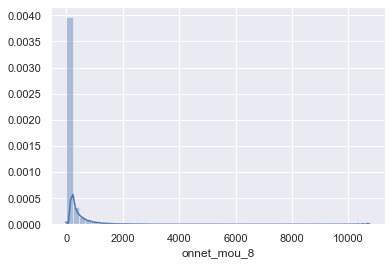

In [68]:
sns.set(style="darkgrid")
univariate_analysis(churn1.onnet_mou_8)

count    99618.000000
mean       176.267041
std        311.372468
min          0.000000
25%         16.540000
50%         75.285000
75%        203.625000
max      10310.760000
Name: offnet_mou_9, dtype: float64


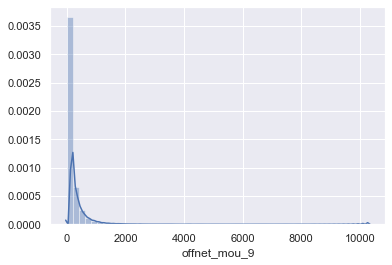

In [69]:
sns.set(style="darkgrid")
univariate_analysis(churn1.offnet_mou_9)

count    99618.000000
mean       283.217129
std        328.298303
min      -2258.709000
25%         93.619250
50%        198.009000
75%        371.302000
max      27731.088000
Name: arpu_6, dtype: float64


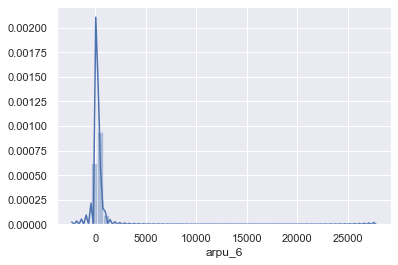

In [70]:
sns.set(style="darkgrid")
univariate_analysis(churn1.arpu_6)

count    99618.000000
mean       127.669824
std        292.886413
min          0.000000
25%          5.590000
50%         31.280000
75%        113.240000
max       7376.710000
Name: onnet_mou_6, dtype: float64


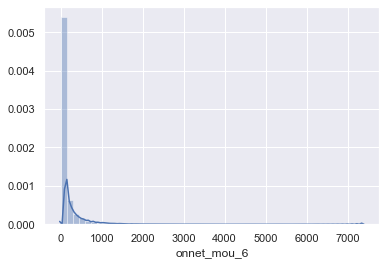

In [71]:
sns.set(style="darkgrid")
univariate_analysis(churn1.onnet_mou_6)

- variables are very skewed towards the left.

## <font color = Blue> Step 5.2 : Bivariate Analysis</font>

In [72]:
# function for Bivariate analysis
def bivariate_analysis(var1, var2):
    if data(var1) == 'numerical' and data(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data(var1) == 'categorical' and data(var2) == 'numerical') or (data(var1) == 'numerical' and data(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

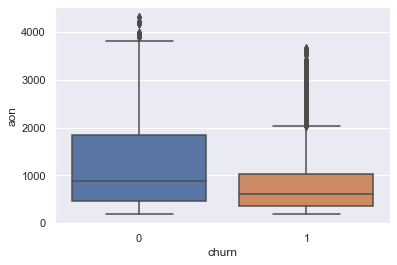

In [73]:
sns.set(style="darkgrid")
bivariate_analysis(high_value_users.churn, high_value_users.aon)

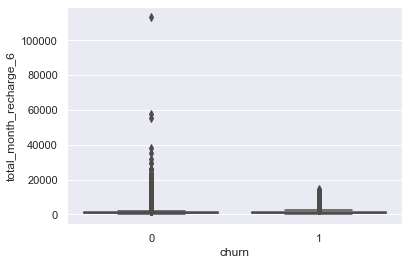

In [74]:
sns.set(style="darkgrid")
bivariate_analysis(high_value_users.churn, high_value_users.total_month_recharge_6)

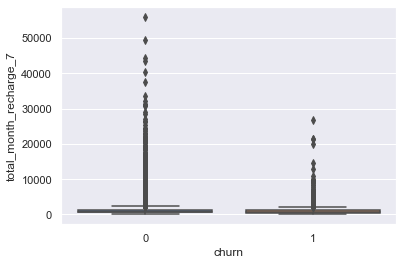

In [75]:
sns.set(style="darkgrid")
bivariate_analysis(high_value_users.churn, high_value_users.total_month_recharge_7)

- we can see there is a outlier in the total month recharge of both 6 & 7 month

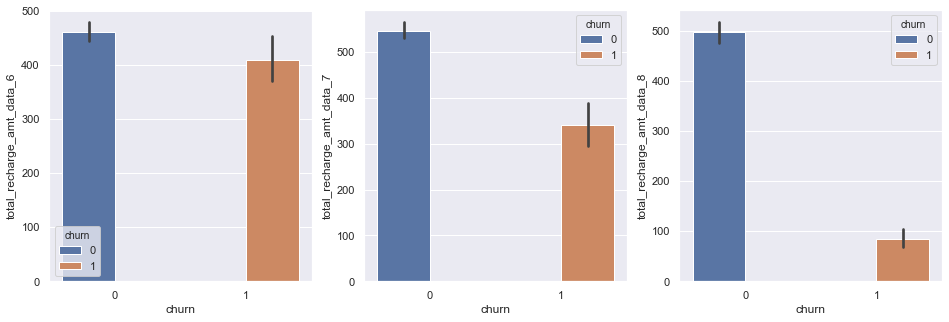

In [76]:
column = ['total_recharge_amt_data_6','total_recharge_amt_data_7','total_recharge_amt_data_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=high_value_users,hue='churn')

#### - we can see that in the month of Auguest very few people churn compared to june and july month. 
#### we also see the month by month chured are decresed

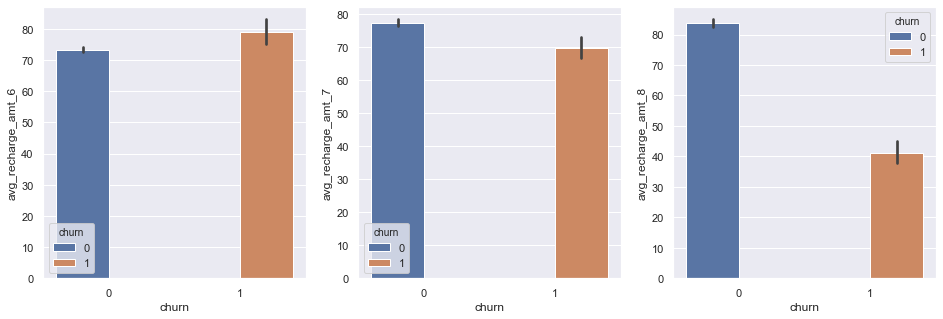

In [77]:
column = ['avg_recharge_amt_6','avg_recharge_amt_7','avg_recharge_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=high_value_users,hue='churn')

#### Average Recharge amount of june is near to 80 , pople who churn there carrier network.
#### Average Recharge amount of july is around to 70 , pople who churn there carrier network.
#### Average Recharge amount of Auguest is near to 4 , pople who churn there carrier network and there is very less people recharge there mobile number who are intrested to switch the network

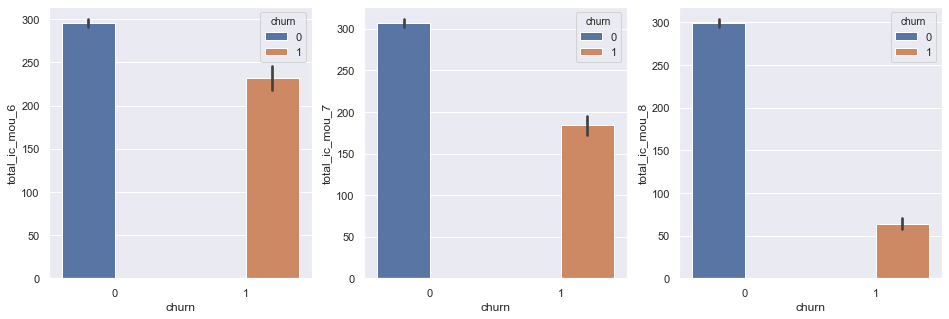

In [78]:
column = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=high_value_users,hue='churn')

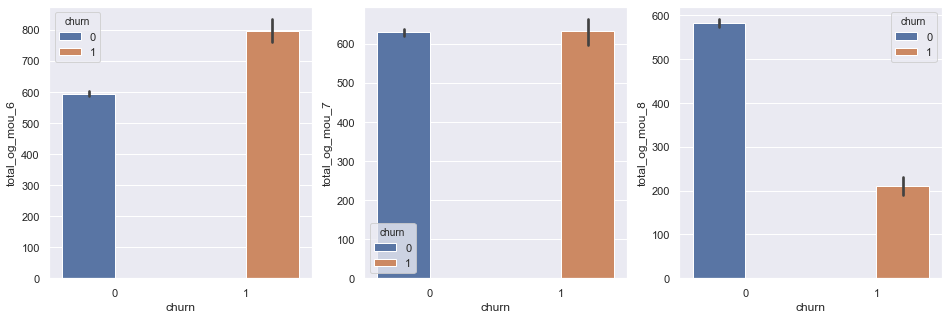

In [79]:
column = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.barplot(x = 'churn',y=j,data=high_value_users,hue='churn')

#### Churners Average. Incoming/Outgoing Monthly call's drops drastically after the 2nd month,Jul.
#### While the non-churners Average. Monthly call's remains consistant and stable with each month.
#### Therefore, users Monthly calls is a key feature to predict churn.

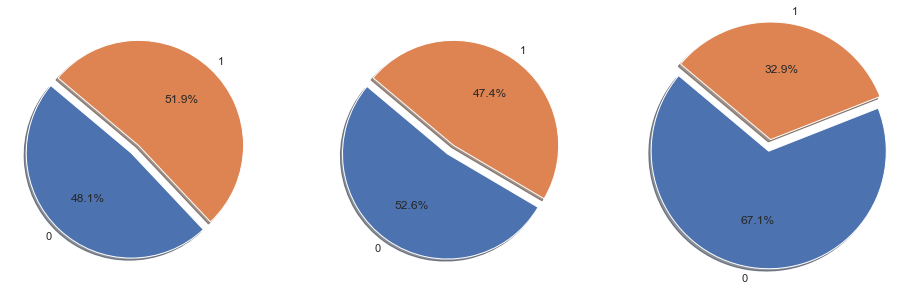

In [80]:
column = ['avg_recharge_amt_6','avg_recharge_amt_7','avg_recharge_amt_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)

    labels = list(high_value_users.groupby('churn')[j].mean().index)
    sizes =list(high_value_users.groupby('churn')[j].mean().values)
    explode = (0.1, 0)
    
    plt.pie(sizes, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
plt.axis('equal')
plt.show()

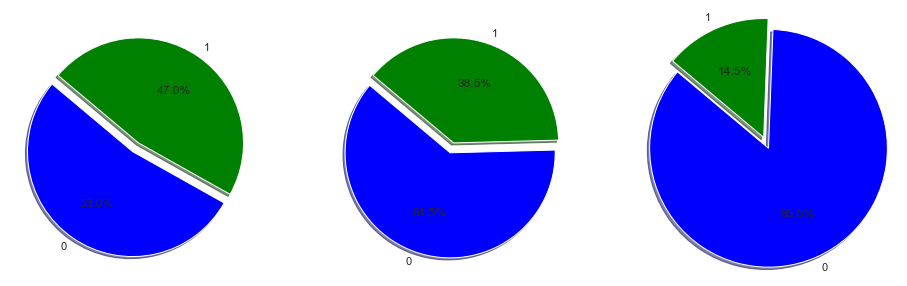

In [81]:
column = ['total_recharge_amt_data_6','total_recharge_amt_data_7','total_recharge_amt_data_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)

    labels = list(high_value_users.groupby('churn')[j].mean().index)
    sizes =list(high_value_users.groupby('churn')[j].mean().values)
    explode = (0.1, 0)
    colors = ['blue', 'green']
    plt.pie(sizes, labels=labels,colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
plt.axis('equal')
plt.show()

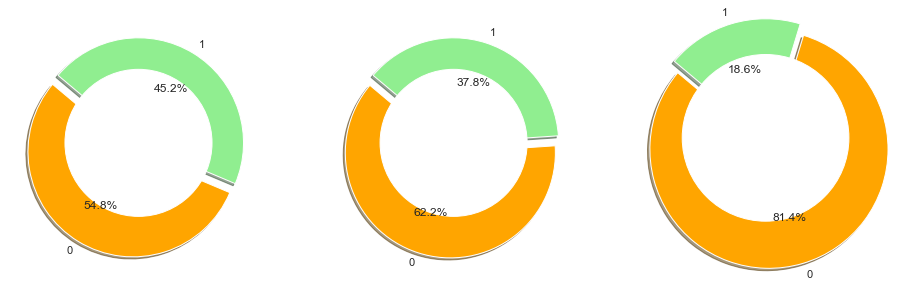

In [82]:
column = ['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    labels = list(high_value_users.groupby('churn')[j].mean().index)
    sizes =list(high_value_users.groupby('churn')[j].mean().values)
    explode = (0.1, 0)
    colors = ['orange', 'lightgreen']
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
plt.axis('equal')
plt.show()

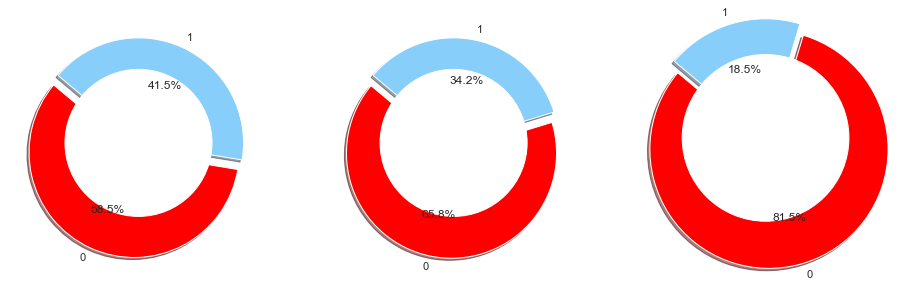

In [83]:
column = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']
plt.figure(figsize=(16,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    labels = list(high_value_users.groupby('churn')[j].mean().index)
    sizes =list(high_value_users.groupby('churn')[j].mean().values)
    explode = (0.1, 0)
    colors = ['red', 'lightskyblue']
    plt.pie(sizes, labels=labels,colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,explode=explode)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
plt.axis('equal')
plt.show()

#### All the above graphs we can notice that there is a severe droping from the (6,7) to 8 months for all the features for churned customers.

In [84]:
# Average.Incoming call per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [85]:
# Average Outgoing call per month churn vs Non-Churn
high_value_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


#### Lets analyse the date columns

In [86]:
date = list([high_value_users.columns[high_value_users.columns.str.contains('date')]])
date

[Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
       dtype='object')]

#### Lets create numeric day column from the date columns¶

In [87]:
high_value_users['last_day_of_month_6'] = high_value_users.last_date_of_month_6.dt.day
high_value_users['last_day_of_month_7'] = high_value_users.last_date_of_month_7.dt.day
high_value_users['last_day_of_month_8'] = high_value_users.last_date_of_month_8.dt.day
high_value_users['day_of_last_rech_6'] = high_value_users.date_of_last_rech_6.dt.day
high_value_users['day_of_last_rech_7'] = high_value_users.date_of_last_rech_7.dt.day
high_value_users['day_of_last_rech_8'] = high_value_users.date_of_last_rech_8.dt.day

#### Now Lets drop the data column from the dataset

In [88]:
high_value_users = high_value_users.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                           'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis='columns')

In [89]:
high_value_users.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,churn,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1,30,31,31,21.0,16.0,8.0
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,

#### we assume that these are the days where there is no use by customers hence i am imputing them with 0¶

In [90]:
high_value_users[['day_of_last_rech_8','day_of_last_rech_7','day_of_last_rech_6',
                  ]] = high_value_users[['day_of_last_rech_8','day_of_last_rech_7','day_of_last_rech_6',]].replace(np.NaN,0)

#### Lets check the null values in dataset

In [91]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
round(100*(high_value_users.isnull().sum()/len(high_value_users.index)),2).sort_values(ascending=False)

day_of_last_rech_8           0.0
total_og_mou_8               0.0
loc_ic_t2f_mou_7             0.0
loc_ic_t2f_mou_6             0.0
loc_ic_t2m_mou_8             0.0
loc_ic_t2m_mou_7             0.0
loc_ic_t2m_mou_6             0.0
loc_ic_t2t_mou_8             0.0
loc_ic_t2t_mou_7             0.0
loc_ic_t2t_mou_6             0.0
total_og_mou_7               0.0
loc_ic_mou_6                 0.0
total_og_mou_6               0.0
og_others_8                  0.0
og_others_7                  0.0
og_others_6                  0.0
spl_og_mou_8                 0.0
spl_og_mou_7                 0.0
spl_og_mou_6                 0.0
isd_og_mou_8                 0.0
loc_ic_t2f_mou_8             0.0
loc_ic_mou_7                 0.0
isd_og_mou_6                 0.0
std_ic_mou_6                 0.0
spl_ic_mou_8                 0.0
spl_ic_mou_7                 0.0
spl_ic_mou_6                 0.0
total_ic_mou_8               0.0
total_ic_mou_7               0.0
total_ic_mou_6               0.0
std_ic_mou

### Derive Some more New Features

#### Dervie some new feature for incoming calls

In [92]:
list(high_value_users.columns[high_value_users.columns.str.contains('.*_ic_.*mou_',regex=True)])

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8']

In [93]:
high_value_users['spl_ic_mou_good_phase'] = (high_value_users.spl_ic_mou_6 + high_value_users.spl_ic_mou_7)/2
high_value_users['isd_ic_mou_good_phase'] = (high_value_users.isd_ic_mou_6 + high_value_users.isd_ic_mou_7)/2

In [94]:
high_value_users['roam_ic_mou_good_phase'] = (high_value_users.roam_ic_mou_6 + high_value_users.roam_ic_mou_7)/2
high_value_users['std_ic_t2m_mou_good_phase'] = (high_value_users.std_ic_t2m_mou_6 + high_value_users.std_ic_t2m_mou_7)/2
high_value_users['std_ic_t2t_mou_good_phase'] = (high_value_users.std_ic_t2t_mou_6 + high_value_users.std_ic_t2t_mou_7)/2
high_value_users['std_ic_t2f_mou_good_phase'] = (high_value_users.std_ic_t2f_mou_6 + high_value_users.std_ic_t2f_mou_7)/2

In [95]:
high_value_users['loc_ic_t2m_mou_good_phase'] = (high_value_users.loc_ic_t2m_mou_6 + high_value_users.loc_ic_t2m_mou_7)/2
high_value_users['loc_ic_t2t_mou_good_phase'] = (high_value_users.loc_ic_t2t_mou_6 + high_value_users.loc_ic_t2t_mou_7)/2
high_value_users['loc_ic_t2f_mou_good_phase'] = (high_value_users.loc_ic_t2f_mou_6 + high_value_users.loc_ic_t2f_mou_7)/2
high_value_users['loc_ic_t2c_mou_good_phase'] = (high_value_users.loc_ic_mou_6 + high_value_users.loc_ic_mou_7)/2

In [96]:
high_value_users['std_ic_mou_good_phase'] = (high_value_users.std_ic_mou_6 + high_value_users.std_ic_mou_7)/2
high_value_users['total_ic_mou_good_phase'] = (high_value_users.total_ic_mou_6 + high_value_users.total_ic_mou_7)/2
high_value_users['og_others_good_phase'] = (high_value_users.og_others_6 + high_value_users.og_others_7)/2
high_value_users['ic_others_good_phase'] = (high_value_users.ic_others_6 + high_value_users.ic_others_7)/2

#### Drop the original columns

In [97]:
high_value_users = high_value_users.drop(  ['roam_ic_mou_6',  'roam_ic_mou_7',  'loc_ic_t2t_mou_6',  'loc_ic_t2t_mou_7', 
                                              'loc_ic_t2m_mou_6',  'loc_ic_t2m_mou_7',  'loc_ic_t2f_mou_6',  
                                              'loc_ic_t2f_mou_7',  'loc_ic_mou_6',  'loc_ic_mou_7',  'std_ic_t2t_mou_6',  
                                              'std_ic_t2t_mou_7',  'std_ic_t2m_mou_6',  'std_ic_t2m_mou_7',  
                                              'std_ic_t2f_mou_6',  'std_ic_t2f_mou_7',  'std_ic_mou_6',  'std_ic_mou_7',  
                                              'total_ic_mou_6',  'total_ic_mou_7',  'spl_ic_mou_6',  'spl_ic_mou_7',  
                                              'isd_ic_mou_6',  'isd_ic_mou_7','og_others_6',
                                             'og_others_7','ic_others_6','ic_others_7'] ,axis='columns' )

In [98]:
high_value_users.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,churn,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,spl_ic_mou_good_phase,isd_ic_mou_good_phase,roam_ic_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2c_mou_good_phase,std_ic_mou_good_phase,total_ic_mou_good_phase,og_others_good_phase,ic_others_good_phase
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1,30,31,31,21.0,16.0,8.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,487.53,609.24,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0,0,0,317.00,159.00,520.71,0

#### Create New feature for outgoing calls

In [99]:
high_value_users['spl_call_og_mou'] = (high_value_users.spl_og_mou_6 + high_value_users.spl_og_mou_7)/2
high_value_users['isdcall_og_mou'] = (high_value_users.isd_og_mou_6 + high_value_users.isd_og_mou_7)/2
high_value_users['roam_og_mou'] = (high_value_users.roam_og_mou_6 + high_value_users.roam_og_mou_7)/2
high_value_users['stdcall_og_t2m_mou'] = (high_value_users.std_og_t2m_mou_6 + high_value_users.std_og_t2m_mou_7)/2
high_value_users['stdcall_og_t2t_mou'] = (high_value_users.std_og_t2t_mou_6 + high_value_users.std_og_t2t_mou_7)/2
high_value_users['stdcall_og_t2f_mou'] = (high_value_users.std_og_t2f_mou_6 + high_value_users.std_og_t2f_mou_7)/2

In [100]:
high_value_users['local_og_t2m_mou'] = (high_value_users.loc_og_t2m_mou_6 + high_value_users.loc_og_t2m_mou_7)/2
high_value_users['local_og_t2t_mou'] = (high_value_users.loc_og_t2t_mou_6 + high_value_users.loc_og_t2t_mou_7)/2
high_value_users['local_og_t2f_mou'] = (high_value_users.loc_og_t2f_mou_6 + high_value_users.loc_og_t2f_mou_7)/2
high_value_users['local_og_t2c_mou'] = (high_value_users.loc_og_t2c_mou_6 + high_value_users.loc_og_t2c_mou_7)/2
high_value_users['local_og_mou'] = (high_value_users.loc_og_mou_6 + high_value_users.loc_og_mou_7)/2
high_value_users['stdcall_og_mou'] = (high_value_users.std_og_mou_6 + high_value_users.std_og_mou_7)/2
high_value_users['total_og_mou'] = (high_value_users.total_og_mou_6 + high_value_users.total_og_mou_7)/2

#### Drop the original Column from the data

In [101]:
high_value_users = high_value_users.drop(['spl_og_mou_6','spl_og_mou_7','isd_og_mou_6','isd_og_mou_7','roam_og_mou_6',
                                            'roam_og_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2t_mou_6',
                                           'std_og_t2t_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','loc_og_t2m_mou_6',
                                           'loc_og_t2m_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2f_mou_6',
                                           'loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6',
                                           'loc_og_mou_7','std_og_mou_6','std_og_mou_7','total_og_mou_6',
                                           'total_og_mou_7'],axis='columns')

In [102]:
high_value_users.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,churn,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,spl_ic_mou_good_phase,isd_ic_mou_good_phase,roam_ic_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2c_mou_good_phase,std_ic_mou_good_phase,total_ic_mou_good_phase,og_others_good_phase,ic_others_good_phase,spl_call_og_mou,isdcall_og_mou,roam_og_mou,stdcall_og_t2m_mou,stdcall_og_t2t_mou,stdcall_og_t2f_mou,local_og_t2m_mou,local_og_t2t_mou,local_og_t2f_mou,local_og_t2c_mou,local_og_mou,stdcall_og_mou,total_og_mou
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1,30,31,31,21.0,16.0,8.0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0,0.000,0.000,0.000
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0,0,0,317.00,159.00,520.71,0,0,0,0.0,0.0,0.0,1580.0,790.0,3638.0,1,30,31,31,27.0,25.0,26.0,0.105,8.295,24.86,109.215,24.360,43.215,219.525,45.200,126.810,391.555,176.810,592.250,0.0,15.465,2.25,0.090,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.0,478.035,68.000,548.385
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,1

In [103]:
high_value_users.shape

(29906, 148)

# <font color = Blue> Step 6 : Correlation Matrix </font>

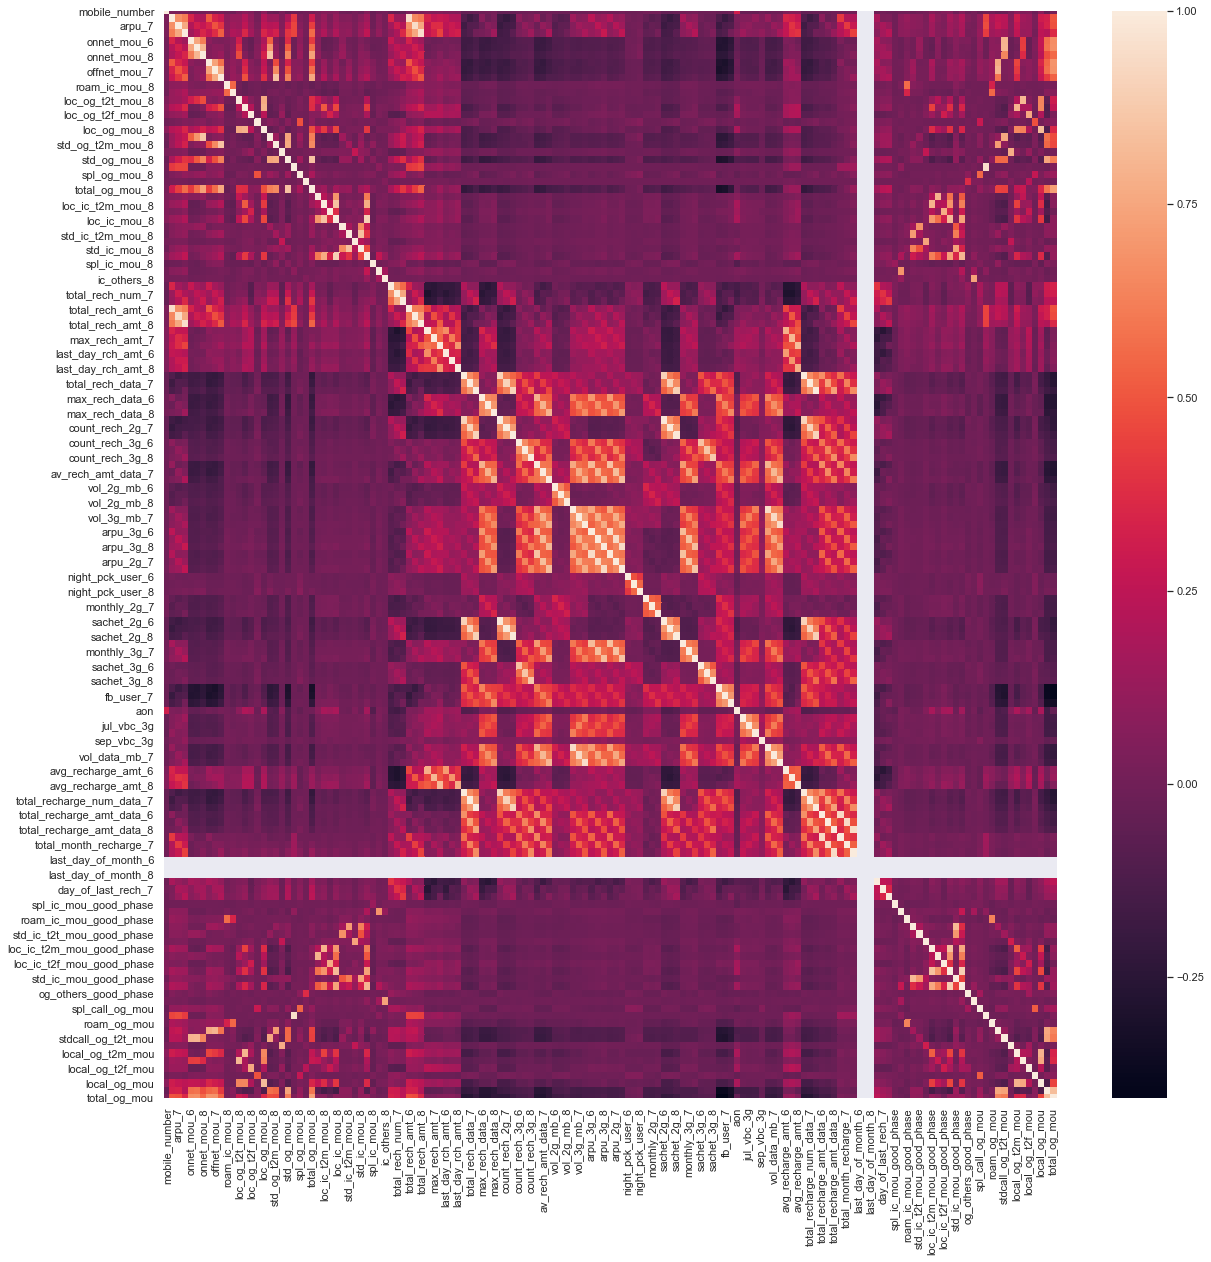

In [104]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(high_value_users.corr())

In [105]:
# Create correlation matrix
corrmatrix = high_value_users.corr().abs()

# Select upper triangle of correlation matrix
upper_corr = corrmatrix.where(np.triu(np.ones(corrmatrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper_corr.columns if any(upper_corr[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:48

['onnet_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'avg_recharge_amt_7', 'avg_recharge_amt_8', 'total_recharge_num_data_6', 'total_recharge_num_data_7', 'total_recharge_num_data_8', 'total_month_recharge_6', 'total_month_recharge_7', 'total_month_recharge_8', 'loc_ic_t2c_mou_good_phase', 'std_ic_mou_good_phase', 'total_ic_mou_good_phase', 'isdcall_og_mou', 'stdcall_og_t2t_mou', 'local_og_t2t_mou', 'local_og_mou', 'total_og_mou']


# <font color = Blue>Step 7 : Outlier Checking & Treatment</font>

## <font color=Blue>Step 7.1 : Outlier Checking</font>
- Use data distribution to find outliers

In [106]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
high_value_users.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_recharge_amt_6,avg_recharge_amt_7,avg_recharge_amt_8,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_recharge_6,total_month_recharge_7,total_month_recharge_8,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,spl_ic_mou_good_phase,isd_ic_mou_good_phase,roam_ic_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2c_mou_good_phase,std_ic_mou_good_phase,total_ic_mou_good_phase,og_others_good_phase,ic_others_good_phase,spl_call_og_mou,isdcall_og_mou,roam_og_mou,stdcall_og_t2m_mou,stdcall_og_t2t_mou,stdcall_og_t2f_mou,local_og_t2m_mou,local_og_t2t_mou,local_og_t2f_mou,local_og_t2c_mou,local_og_mou,stdcall_og_mou,total_og_mou
count,2.990600e+04,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.00000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.0,29906.0,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.0000

- As we can seen in the above there is not many more outlier in the dataset so we didnot perofrm the outlier treatment in givem data

# <font color = blue>Step 8 : Lets Build the Model</font>


In [107]:
# load the libraries
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [108]:
# create copy of final dataframe
high_val_customer = high_value_users.copy()

In [109]:
# removing the columns not required for modeling
high_val_customer.drop(['mobile_number'], axis=1, inplace=True)

## <font color=blue>Step 8.1 : Create X,y Variables </font>

In [110]:
#putting features variables in X
X = high_val_customer.drop(['churn'], axis=1)

#putting response variables in Y
y = high_val_customer['churn']

## <font color=blue> Step 8.2 : Applying Standard Scale </font>

In [111]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

- Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

- Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.
- In Short, any Algorithm which is Not Distance based is Not affected by Feature Scaling.



## <font color = blue>Step 8.3: Split The Data into Train - Test </font>

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20934, 146)
(8972, 146)
(20934,)
(8972,)


# <font color=blue>Model 1 : Applying PCA + Logestic Regression without Data Handiling </font>

## <font color = blue>Model 1.1 : Applying PCA </font>

- When should I use PCA?

1) Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?

2) Do you want to ensure your variables are independent of one another?

3) Are you comfortable making your independent variables less interpretable?

In [114]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [115]:
df_train_pca = pca.fit_transform(X_train)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(20934, 146)
(8972, 146)


### Components from the PCA

In [116]:
pca.components_

array([[ 3.33232757e-04,  2.36213987e-03,  1.15342542e-02, ...,
        -3.05104548e-02, -8.87876998e-02, -9.63994457e-02],
       [ 1.76999798e-01,  1.89216847e-01,  1.90463887e-01, ...,
         1.23478545e-01,  7.02056126e-02,  1.36599645e-01],
       [ 1.10349625e-01,  1.34378186e-01,  1.39348353e-01, ...,
         5.00328203e-02,  1.37418520e-01,  1.56912332e-01],
       ...,
       [ 0.00000000e+00,  1.98654965e-17,  3.87782797e-17, ...,
        -7.44855170e-13, -1.39024860e-12,  1.53442270e-12],
       [-0.00000000e+00,  5.02035471e-16, -7.65846587e-18, ...,
         9.48494722e-15, -7.88810799e-13, -2.81132297e-13],
       [-0.00000000e+00, -1.16988694e-16, -6.66720351e-17, ...,
        -7.55960240e-13, -1.10865355e-12,  5.31132038e-13]])

- Looking at the explained variance ratio for each component

In [117]:
pca.explained_variance_ratio_

array([1.41573716e-01, 1.00520789e-01, 6.96063636e-02, 5.31418568e-02,
       3.65344989e-02, 2.93505154e-02, 2.70401327e-02, 2.58027463e-02,
       2.51981695e-02, 2.32011267e-02, 1.95379862e-02, 1.84362712e-02,
       1.82490130e-02, 1.68876682e-02, 1.67589550e-02, 1.51473885e-02,
       1.37150767e-02, 1.32661317e-02, 1.28387388e-02, 1.22707299e-02,
       1.16412582e-02, 1.14832023e-02, 1.10988542e-02, 1.08658818e-02,
       9.76897227e-03, 9.60997643e-03, 8.92907968e-03, 8.69948550e-03,
       8.35757666e-03, 8.01785521e-03, 7.83414421e-03, 7.52698988e-03,
       7.08724978e-03, 6.92943563e-03, 6.62271117e-03, 6.58405063e-03,
       6.28247907e-03, 6.05922387e-03, 5.84313180e-03, 5.75744721e-03,
       5.64968609e-03, 5.41770169e-03, 5.07507027e-03, 4.92900390e-03,
       4.85409824e-03, 4.67941204e-03, 4.58339739e-03, 4.46993020e-03,
       4.37670684e-03, 4.25989869e-03, 4.06358383e-03, 3.90773872e-03,
       3.87646838e-03, 3.60390582e-03, 3.56236595e-03, 3.51919847e-03,
      

### Making a scree plot for the explained variance

In [118]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [119]:
# finding Pca componetns
for i in range(len(var_cumu)):
    print('{0}:{1}'.format(i+1,round(var_cumu[i]*100,2)))


1:14.16
2:24.21
3:31.17
4:36.48
5:40.14
6:43.07
7:45.78
8:48.36
9:50.88
10:53.2
11:55.15
12:56.99
13:58.82
14:60.51
15:62.18
16:63.7
17:65.07
18:66.4
19:67.68
20:68.91
21:70.07
22:71.22
23:72.33
24:73.42
25:74.39
26:75.35
27:76.25
28:77.12
29:77.95
30:78.76
31:79.54
32:80.29
33:81.0
34:81.69
35:82.36
36:83.01
37:83.64
38:84.25
39:84.83
40:85.41
41:85.97
42:86.51
43:87.02
44:87.51
45:88.0
46:88.47
47:88.93
48:89.37
49:89.81
50:90.24
51:90.64
52:91.03
53:91.42
54:91.78
55:92.14
56:92.49
57:92.83
58:93.16
59:93.47
60:93.78
61:94.08
62:94.35
63:94.6
64:94.84
65:95.07
66:95.3
67:95.52
68:95.74
69:95.94
70:96.14
71:96.34
72:96.54
73:96.73
74:96.91
75:97.08
76:97.26
77:97.42
78:97.58
79:97.73
80:97.87
81:98.01
82:98.15
83:98.27
84:98.39
85:98.51
86:98.62
87:98.73
88:98.83
89:98.93
90:99.02
91:99.11
92:99.2
93:99.28
94:99.36
95:99.44
96:99.51
97:99.57
98:99.63
99:99.68
100:99.73
101:99.78
102:99.81
103:99.85
104:99.87
105:99.9
106:99.93
107:99.95
108:99.98
109:99.99
110:100.0
111:100.0
112:100

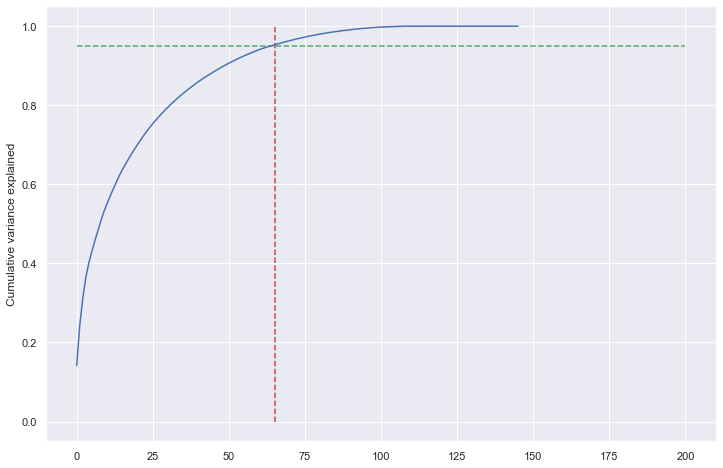

In [120]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### From above scree plot, Around 95.07% of the information is being explained through 65 components.

In [121]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=65)

In [122]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=65, whiten=False)

In [123]:
df_train_pca79 = pca_final.fit_transform(X_train)
print(df_train_pca79.shape)
df_test_pca79 = pca_final.transform(X_test)
print(df_test_pca79.shape)

(20934, 65)
(8972, 65)


## <font color=blue>Model 1.2: Apply Logistic Regression On PCA </font>

In [124]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca79, y_train)

# Predicted probabilities
y_pred79 = logsk1.predict(df_test_pca79)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred79)

### Model Evaluation

In [125]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred79))

[[8093  138]
 [ 501  240]]


In [126]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred79))

LogisticRegression accuracy with PCA:  0.928778421756576


### Drwaing Roc Curve

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

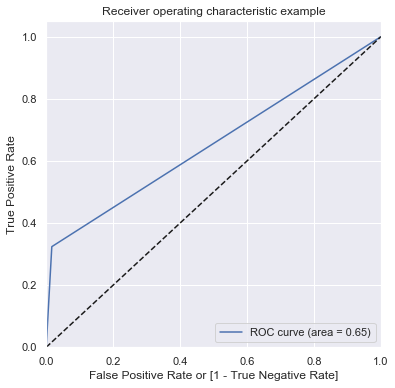

(array([0.        , 0.01676589, 1.        ]),
 array([0.        , 0.32388664, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [128]:
draw_roc(y_test, y_pred79)

In [129]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_test, y_pred79))

'0.65'

# <font color=blue>Model 2: Applying PCA + Logestic Regression with Imbalance Data Handiling</font>

###  Lets Check the Data Imbalance Ratio in train & test data

In [130]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Data Imbalance in Train Data: {}".format(y_train_imb))
print("Data Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (20934, 146)
X_test Dataframe Shape (8972, 146)
Data Imbalance in Train Data: 0.0870852157656956
Data Imbalance in Test Data: 0.09002551330336532


## <font color = blue>Model 2.1: Now apply the SMOTE Method to Handle imbalanced Data </font>

In [131]:
# load the libraries
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [132]:
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(38514, 146)
(38514,)


19257

In [133]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38514, 146)
y_tr Dataframe Shape (38514,)
Imbalance in Train Data: 1.0


## <font color = Blue>Model 2.2: Applying PCA on Data </font>

In [134]:
#Improting the PCA module
from sklearn.decomposition import PCA

pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [135]:
df_train_pca1 = pca.fit_transform(X_tr)
print(df_train_pca1.shape)

df_test_pca2 = pca.transform(X_test)
print(df_test_pca2.shape)

(38514, 146)
(8972, 146)


### Components from PCA

In [136]:
pca.components_

array([[-2.58302866e-02, -8.00668283e-03,  2.30129753e-02, ...,
        -1.51048747e-02, -1.27793646e-01, -1.22985536e-01],
       [ 1.73106142e-01,  2.04190934e-01,  2.04330559e-01, ...,
         1.13417726e-01,  1.00642910e-01,  1.57643867e-01],
       [ 2.99162230e-02,  8.69358923e-02,  9.95528523e-02, ...,
         4.80253216e-02,  1.15390765e-01,  1.32580510e-01],
       ...,
       [ 0.00000000e+00,  1.09887555e-17, -3.38505743e-18, ...,
        -9.38026406e-14, -4.16078839e-13,  4.75384780e-13],
       [ 0.00000000e+00, -1.71979450e-16, -1.29036622e-18, ...,
        -3.08273217e-13, -1.93747923e-14,  3.92127692e-13],
       [ 0.00000000e+00,  7.90888767e-17,  2.07733467e-16, ...,
         1.74532715e-13,  3.05954932e-13, -3.47449247e-13]])

In [137]:
pca.explained_variance_ratio_

array([1.36750181e-01, 9.56671017e-02, 6.95196306e-02, 5.01004398e-02,
       3.87421652e-02, 3.60444329e-02, 3.00991311e-02, 2.88766486e-02,
       2.77940187e-02, 2.55977283e-02, 2.19873480e-02, 2.06730604e-02,
       1.86432622e-02, 1.80308129e-02, 1.67779796e-02, 1.45124581e-02,
       1.36219224e-02, 1.30203476e-02, 1.21420885e-02, 1.08528963e-02,
       1.04330723e-02, 1.02011839e-02, 1.00370880e-02, 9.67752975e-03,
       9.31503874e-03, 9.06791270e-03, 8.82907202e-03, 8.45778465e-03,
       8.30790497e-03, 8.10656285e-03, 7.64248021e-03, 7.43023079e-03,
       7.33246464e-03, 7.13651930e-03, 6.40313144e-03, 6.21608036e-03,
       6.08877039e-03, 5.85652114e-03, 5.57659384e-03, 5.50538291e-03,
       5.40205336e-03, 5.34918384e-03, 5.27980749e-03, 5.17380739e-03,
       5.04243087e-03, 4.94678821e-03, 4.74780811e-03, 4.56820574e-03,
       4.46076595e-03, 4.27409550e-03, 4.03344114e-03, 3.97146813e-03,
       3.73426796e-03, 3.65958361e-03, 3.45561353e-03, 3.39616889e-03,
      

### Making a scree plot for the explained variance

In [138]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [139]:
# finding Pca componetns
for i in range(len(var_cumu)):
    print('{0}:{1}'.format(i+1,round(var_cumu[i]*100,2)))

1:13.68
2:23.24
3:30.19
4:35.2
5:39.08
6:42.68
7:45.69
8:48.58
9:51.36
10:53.92
11:56.12
12:58.19
13:60.05
14:61.85
15:63.53
16:64.98
17:66.34
18:67.65
19:68.86
20:69.95
21:70.99
22:72.01
23:73.01
24:73.98
25:74.91
26:75.82
27:76.7
28:77.55
29:78.38
30:79.19
31:79.95
32:80.7
33:81.43
34:82.14
35:82.78
36:83.4
37:84.01
38:84.6
39:85.16
40:85.71
41:86.25
42:86.78
43:87.31
44:87.83
45:88.33
46:88.83
47:89.3
48:89.76
49:90.2
50:90.63
51:91.04
52:91.43
53:91.81
54:92.17
55:92.52
56:92.86
57:93.18
58:93.49
59:93.79
60:94.08
61:94.36
62:94.63
63:94.89
64:95.13
65:95.36
66:95.57
67:95.79
68:95.99
69:96.19
70:96.38
71:96.56
72:96.73
73:96.91
74:97.08
75:97.25
76:97.41
77:97.57
78:97.73
79:97.87
80:98.01
81:98.14
82:98.27
83:98.39
84:98.5
85:98.62
86:98.72
87:98.82
88:98.91
89:98.99
90:99.08
91:99.16
92:99.24
93:99.32
94:99.4
95:99.47
96:99.54
97:99.6
98:99.66
99:99.7
100:99.75
101:99.79
102:99.82
103:99.85
104:99.88
105:99.91
106:99.93
107:99.95
108:99.97
109:99.99
110:100.0
111:100.0
112:100.0

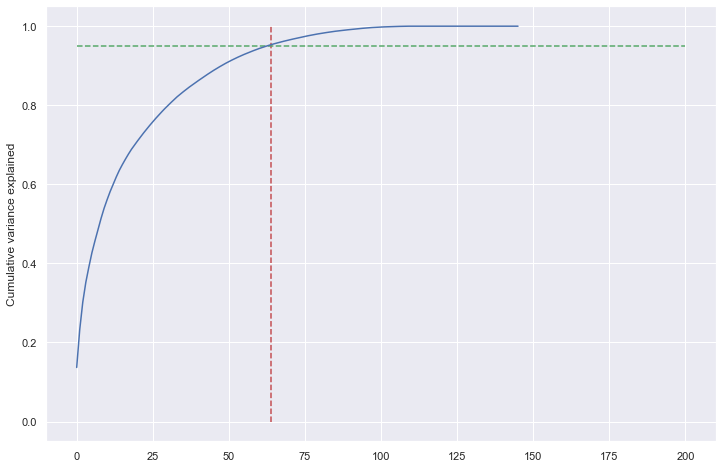

In [140]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=64, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## <font color=blue>Model 2.3: Apply logistic regression with 64 columns (95% explained variance)</font>

In [141]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca79 = IncrementalPCA(n_components=64)

In [142]:
df_train_pca48 = pca79.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca79.transform(X_test)
print(df_test_pca48.shape)

(38514, 64)
(8972, 64)


In [143]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [144]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test,y_pred48)
confusion

array([[6901, 1330],
       [ 127,  614]], dtype=int64)

In [145]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.8376058849754793


### Plot ROC curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

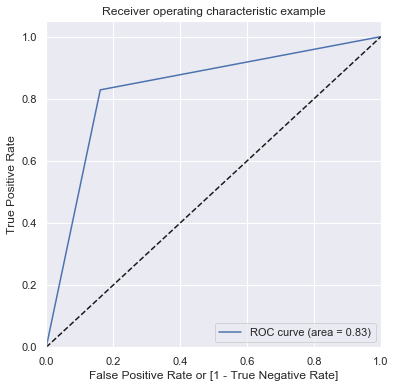

(array([0.        , 0.16158425, 1.        ]),
 array([0.        , 0.82860999, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [147]:
draw_roc(y_test, y_pred48)

In [148]:
"{:2.2f}".format(metrics.roc_auc_score(y_test, y_pred48))

'0.83'

### We see an overall AUC score of 0.83 looks like we did a decent job.

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred48))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8376058849754793
Sensitivity:  0.8286099865047234
Specificity:  0.8384157453529341
false postive rate:  0.16158425464706597
positive predictive value:  0.31584362139917693
Negative predictive value:  0.9819294251565168
Misclassification Rate:  0.16239411502452072


# <font color=blue>Model 3: LASSO & Random Forest </font>

## <font color=blue>Step 3.1 :Feature Reduction technique using LASSO method</font>

In [150]:
# load the lasso & feature selection libraries
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
rfe1 = model.get_support(indices=True)

In [151]:
### Feature reduction using lasso
print(X_lasso.shape)
print(rfe1)

(38514, 43)
[  1   3   9  10  12  13  18  21  22  23  27  32  33  36  37  38  39  43
  47  49  50  56  65  72  73  78  79  80  90  92  93  94  97 100 103 105
 106 117 118 121 130 135 144]


In [152]:
# print the important feature after reduction 
imp_lasso_features = list(high_val_customer.columns[rfe1])
print("important Features after reduction by LASSO for model buidling: ", imp_lasso_features)

important Features after reduction by LASSO for model buidling:  ['arpu_7', 'onnet_mou_6', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_8', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'fb_user_6', 'fb_user_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g', 'vol_data_mb_8', 'avg_recharge_amt_8', 'total_recharge_num_data_7', 'total_recharge_num_data_8', 'day_of_last_rech_6', 'day_of_last_rech_7', 'isd_ic_mou_good_phase', 'std_ic_mou_good_phase', 'isdcall_og_mou', 'local_og_mou']


In [153]:
X_train = X_lasso
y_train = y_tr

In [154]:
print ("No of Feature holds %d observations & %d features" % X_train.shape)

No of Feature holds 38514 observations & 43 features


## <font color = blue>Step 3.2 :Random Forest with Default Hyperparameter</font>

- Let's first fit a random forest model with default hyperparameters.

In [155]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [156]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, rfe1]
predictions = rfc.predict(X_test)

In [158]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8231
           1       0.58      0.65      0.61       741

    accuracy                           0.93      8972
   macro avg       0.77      0.80      0.79      8972
weighted avg       0.94      0.93      0.93      8972



In [159]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7887  344]
 [ 263  478]]


In [160]:
print(accuracy_score(y_test,predictions))

0.9323450735621935


- random forest model with default hyperparameters accuracy score is 0.93

- So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

## <font color=blue>Step 3.3 :Hyperparameter Tuning </font>

### <font color =blue> Step 3.3.1 : Tuning max_depth</font>

- Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(16,7))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- we can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

- Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### <font color =blue>Step 3.3.2: find optimal n_estimators</font>

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(16,7))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color = blue>Step 3.3.3 : GridSearchCV to find optimal max_features</font>

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8,12,16,20, 24,28,32,36,40,42]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(16,7))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color = blue> Step 3.3.4 : GridSearchCV to find optimal min_samples_leaf</font>

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(16,7))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color = blue>Step 3.3.5: GridSearchCV to find optimal min_samples_split </font>

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure(figsize=(16,7))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <font color = blue>Step 3.3.6 : Grid Search to Find Optimal Hyperparameters</font>
- We can now find the optimal hyperparameters using GridSearchCV.

In [ ]:
# Create the parameter grid based on the results of random search 
#param_grid = {
#    'max_depth': [4,8,10],
#    'min_samples_leaf': range(100, 400, 200),
#    'min_samples_split': range(200, 500, 200),
#    'n_estimators': [100,200, 300], 
#    'max_features': [5, 10,20,30,40,42]
#}
## Create a based model
#rf = RandomForestClassifier()
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
 #                         cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

### i am going to comment above code of **Grid Search to Find Optimal Hyperparameters** Because it take too much time to compute the result
### i Run above code one time and finding the Optimal Hyperparameters value and below final model parameters based on that result.

# <Font color=Orange> Step 3.3.7: Fitting the final model with the best parameters obtained from grid search.</font>

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_rm = metrics.confusion_matrix( y_test, predictions )
confusion_rm

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
TN = confusion_rm[0,0] # true positive 
TP = confusion_rm[1,1] # true negatives
FP = confusion_rm[0,1] # false positives
FN = confusion_rm[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# <font color = blue>Step 9: Random Forest Model with All important feature gives</font>
- 89% of Accuracy and 75% of Sensitivity

In [ ]:
# feature_importance
importance = rfc.feature_importances_

In [ ]:
# create dataframe
feature_importance = pd.DataFrame({'variables': imp_lasso_features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

In [ ]:
# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

----------------------------------------------------------------------------------------------------------------------------

#  <font color =red>Model Summary</font>

- Recall is the most important business metric for the telecom churn problem. 
- The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. 
- The cost to the company of churning is much higher than having a few false positives.



### <font color = red>1) Logistic Regression + PCA model without Data Imbalance Handiling Summary </font>
 
- Accuracy Score :  0.92
- Roc Curve : 0.65

### <font color =red>2) Logistic Regression + PCA model with Data Imbalance Handiling Summary </font>
 
- Accuracy Score :  0.83
- Roc Curve : 0.83
- Sensitivity:  0.82
- Specificity:  0.83
- false postive rate:  0.16
- positive predictive value:  0.31
- Negative predictive value:  0.98
- Misclassification Rate:  0.16

### <font color=red>2) Random Forest Summary</font>
 
- Accuracy Score:  0.89
- Sensitivity:  0.75
- Specificity:  0.91
- false postive rate:  0.088
- positive predictive value:  0.43
- Negative predictive value:  0.97
- Misclassification Rate:  0.10

- Overall, the Logistic Regression + PCA model with Data Imbalance Handiling performs best. It achieved the best recall accuracy of 83%.
- Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.


- From the Tree Family,The Random Forest avoided overfitting but obtained only 89% recall accuracy.But it Will take too much time to Give optinal Hyperparameter using Grid Search

# <font color = Green>Final Choice of Model</font>

## <font color=purple>So, weare Going to Consider  Logistic Regression + PCA model with Data Imbalance Handiling as my Final Model </font>

## <font color=purple> Our Top 12 important predictor features produced by  RandomForest  that belong to month 8.</font>

#### Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

- Hence, it is clear that what happens in the action phase (3rd month August). has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

| variables	                            |importance_percentage|
|---------------------------------------|-------------------- |
| total_ic_mou_8                        |    22.962982        |
| loc_ic_mou_8                          |    15.663658        |
| roam_og_mou_8                         |    10.164568        |
| day_of_last_rech_7                    |    9.543798         |
| fb_user_8                             |    7.263854         |
| roam_ic_mou_8                         |    5.941246         |
| last_day_rch_amt_8                    |    4.794233         |
| loc_og_mou_8                          |    4.508385         |
| total_recharge_num_data_8             |    2.963905         |
| total_rech_data_8                     |    2.823708         |
| total_og_mou_8	                    |    1.978915         |
| avg_recharge_amt_8	                |    1.440060         |

- total incoming & Local incoming call have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.


- Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

## <font color = Darkblue>Now, we will look at some of the stratergic steps which can be taken to retain these predicted churners.</font>

### Based on modeling an EDA following are our recommendations to reduce customer churn:
 
#### <font color=Red>1) Focus on Privilege Customers : We should be giving offers and customised plans to customer</font>

#### <font color=Red>2) We should focus on lower or nill roaming charges so that customers do not seek local network when travelling to non local network area</font>

#### <font color=Red>3) Customized plans : We should be continously be monitoring customer behaviour to make them stick to our netwrk, for    example customised plans for those who have high mou etc.</font>

#### <font color=red > 4)Tariff should be reduced for data services ,a better 2G area coverage where 3G is not available.</font>

#### <font color=Red>5) We should focus on expansion of our existing 3G network to areas where it is currently not present.</font>|

#### <font color = red> 6) Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported.</font>

#### <font color=red> 7) Marketing team must come up with campaigns which targets these high-value to-be churner.</font>

-------------------------------------------------------------------------------------------------------------------------------